In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [26]:
df = pd.read_csv(r"C:\Users\singh\Downloads\cancer_data.csv")
display(df.shape)
display(df.head())

(569, 32)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Treatment 

In [27]:
cancerDf = df.drop('id', axis=1)
cancerDf['diagnosis'] = np.where(cancerDf['diagnosis']=="M",1,0)
cancerDf.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
inputs = cancerDf.drop('diagnosis', axis=1)
target = cancerDf['diagnosis']
# target.head()

# Model Training & Testing

In [29]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=42 )

In [30]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.303800,0.033220,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.038720,0.015670,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,0.4098,2.2650,2.608,23.52,0.008738,0.03938,0.043120,0.015600,0.04192,0.005822,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.497,16.64,0.007189,0.01035,0.010810,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


# Feature Selection with Correlation Method

<AxesSubplot:>

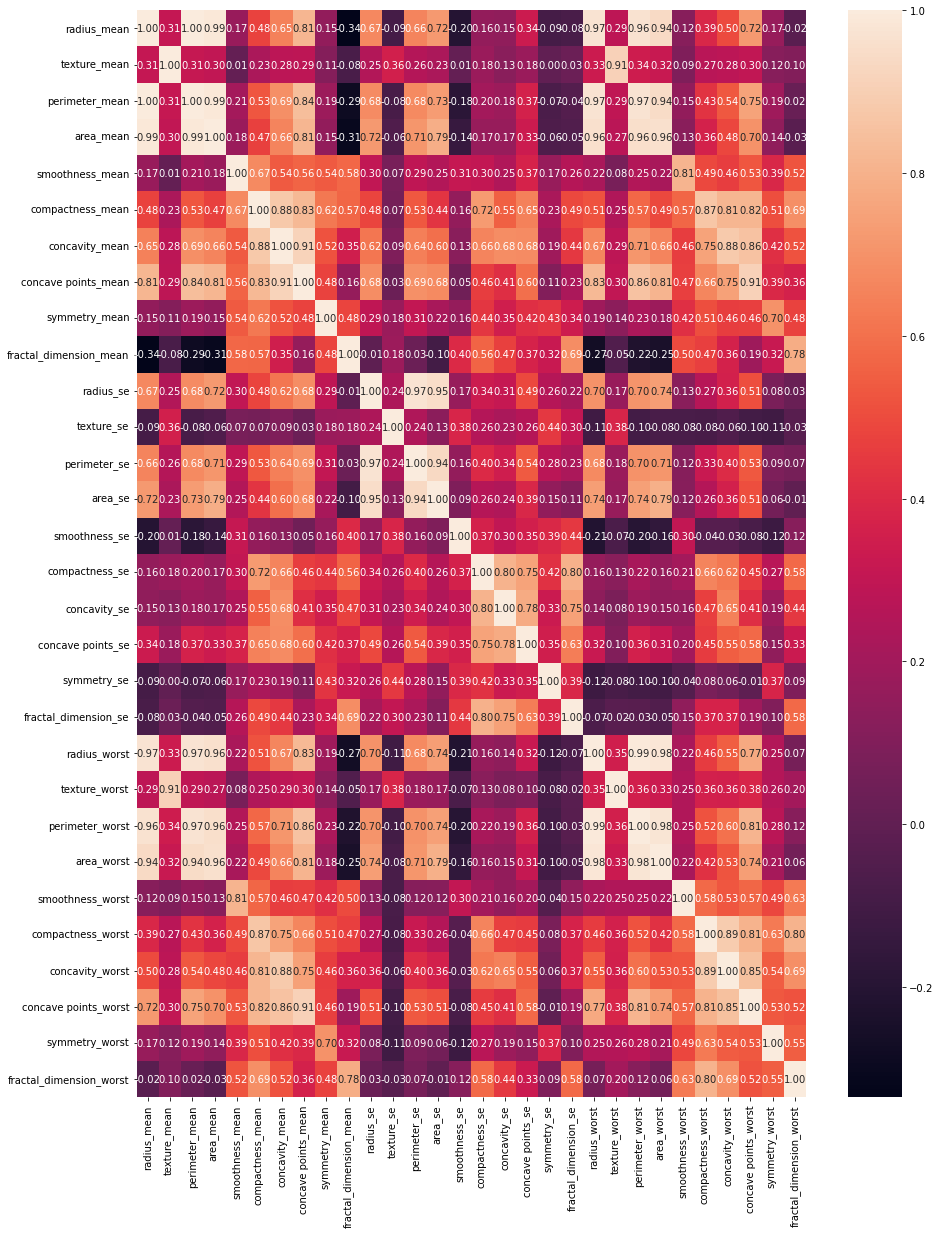

In [31]:
corrDf = x_train.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corrDf,annot=True,fmt='.2f',annot_kws=dict(size=10))

In [32]:
corr_pairs=[]
for i in range(len(corrDf.columns)):
    for j in range(i):
        if corrDf.iloc[i,j]>0.9:
            corr_pairs.append((corrDf.columns[i],corrDf.columns[j],corrDf.iloc[i,j]))
corr_pairs 


[('perimeter_mean', 'radius_mean', 0.9978504973669354),
 ('area_mean', 'radius_mean', 0.9866089172918142),
 ('area_mean', 'perimeter_mean', 0.9859851502385307),
 ('concave points_mean', 'concavity_mean', 0.9146711978212442),
 ('perimeter_se', 'radius_se', 0.9735601962517728),
 ('area_se', 'radius_se', 0.9510250334076848),
 ('area_se', 'perimeter_se', 0.9372708955806978),
 ('radius_worst', 'radius_mean', 0.9691340489013283),
 ('radius_worst', 'perimeter_mean', 0.969619731837457),
 ('radius_worst', 'area_mean', 0.9605194984327957),
 ('texture_worst', 'texture_mean', 0.9097177226375233),
 ('perimeter_worst', 'radius_mean', 0.9635355006782297),
 ('perimeter_worst', 'perimeter_mean', 0.9696743955740708),
 ('perimeter_worst', 'area_mean', 0.9557008766121756),
 ('perimeter_worst', 'radius_worst', 0.9933154432258244),
 ('area_worst', 'radius_mean', 0.9418493240555108),
 ('area_worst', 'perimeter_mean', 0.9432828152115909),
 ('area_worst', 'area_mean', 0.95972345764879),
 ('area_worst', 'radius

In [33]:
features_to_drop = []
for i,j,k in corr_pairs:
    features_to_drop.append(i)
    
features_to_drop = list(set(features_to_drop))    
features_to_drop

['concave points_worst',
 'perimeter_worst',
 'area_mean',
 'radius_worst',
 'concave points_mean',
 'perimeter_mean',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'area_worst']

In [34]:
x_train_selected = x_train.drop(features_to_drop,axis=1)
x_test_selected = x_test.drop(features_to_drop,axis=1)
x_test_selected.shape

(114, 20)

In [35]:
logit = LogisticRegression()

In [36]:
logit.fit(x_train,y_train)

LogisticRegression()

In [37]:
prediction = logit.predict(x_test)

In [38]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [39]:
logitSelected = LogisticRegression()

In [40]:
logitSelected.fit(x_train_selected, y_train)

LogisticRegression()

In [41]:
predSelected = logitSelected.predict(x_test_selected)

In [42]:
print(classification_report(y_test, predSelected))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

